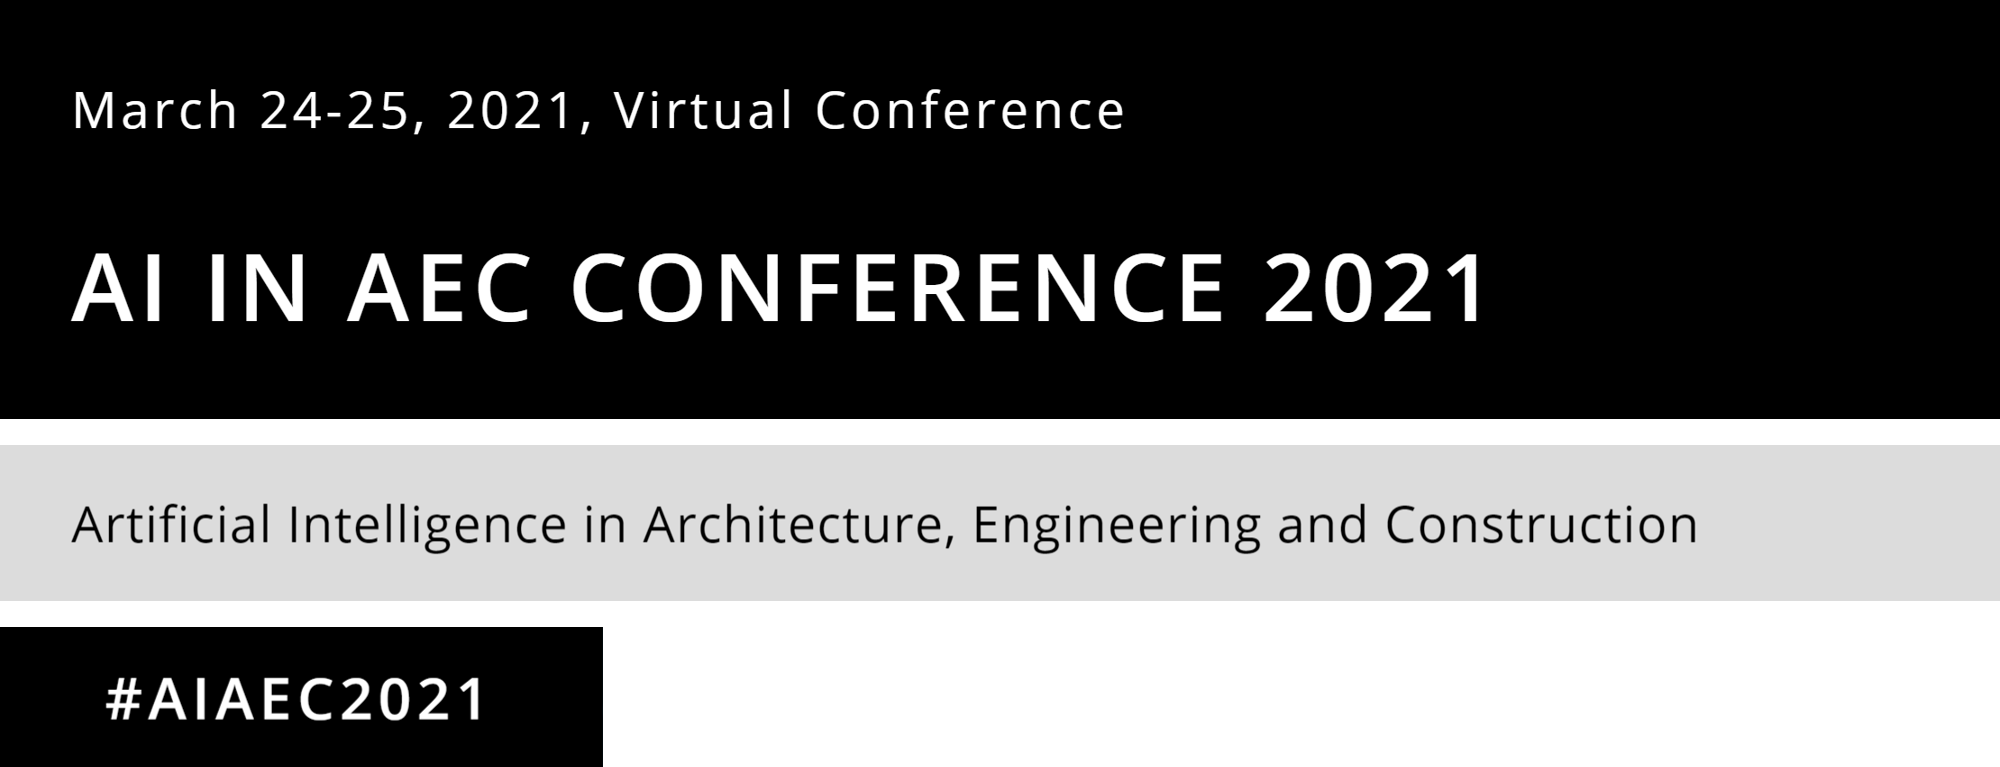

# Algorithm-based Estimate: An Alternate Approach of Construction Cost Prediction in Early Stage of Design

## Definition
### Project Overview
I am proposing an algorithm-based solution for cost estimating in the Architecture, Engineering, and Construction (AEC) industry. There are two major approaches nowadays for a preconstruction team to complete estimates after receiving design packages. The first one is to dig into the drawing details and build up all the estimate items line by line, and the second one is to generate a Rough Order of Magnitude (ROM) estimate by selecting comparable projects from the project database and simply averaging their costs. The detailed estimate is much more accurate and yet more time-consuming. On the other hand, one can create a high-level estimate in a considerably short amount of period with less confidence, however.

I am a preconstruction engineer/estimator in Hathaway Dinwiddie Construction Company (HDCCo), one of the largest general contractors in the Bay Area, and is still continuously growing. Along with the expansion of the company, our daily estimating work becomes heavier yet allows less time to process. As a company with prestige over 100 years in the industry, we refuse to compromise and will always deliver at our best with no excuses. Thus, I would like to propose a new approach to respond to the challenge. I want to balance the two current workflows, to maximize the pros and minimize the cons of both, by harvesting the legacy data with Machine Learning techniques. I believe that data should have a better as well as faster idea.

In [1]:
# Import numpy & pandas
import numpy as np
import pandas as pd

# Import graph libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Allows the use of display() for DataFrames
from IPython.display import display
ss
# Set programwide random state. This ensures results are consistent.
import random
np.random.seed(327)

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Problem Statement
The problem that is to be solved is how to predict the construction cost based on the project parameters with the algorithm-based approach. The solution I am proposing is Machine Learning Regression Model. The inputs of the problem are the cost-related project descriptions, which will be further discussed in the following section, and the output is the cost prediction in the format of United States Dollar (USD). The problem is expected to receive both non-numerical, which can then be translated into true/false values, and numerical inputs, and to generate numerical output; thus, the problem is quantifiable and measurable. The problem is also expected to be replicable as once the questions/inputs are asked correctly, one can retrieve the answer through the same project/algorithm pipeline.

### Metrics
There are three evaluation metrics applicable to the Machine Learning regression algorithms. R2 score will be used to evaluate both the benchmark as well as the Machine Learning models and justify their performances.

* Mean absolute error
> The error is equal to the sum of all the absolute values of the differences between the predicted and the true values. One drawback is that the function of absolute value is not differentiable. Therefore, it does not apply to methods like gradient descent.
* Mean squared error
> The error is equal to the sum of the square values, instead of the absolute one, of the differences between the predicted and the true values. It is more commonly used for evaluation purposes than the previous metric.
* R2 Score
> The most common approach for performance evaluation. R2 score is calculated based on comparing the current model to the simplest possible model. R2 score is represented as 1 minus the ratio of mean squared errors of the Machine learning model and the simplest model. The range of the score is between 0 and 1, and a higher score indicates a better model.

In [2]:
# Import evaluation metric from sklearn - R2
from sklearn.metrics import r2_score

### Machine Learning Pipeline
The algorithm workflow is broken down into 12 steps. Please refer to the following diagram (amended from the [presentation](https://www.autodesk.com/autodesk-university/class/Legacy-Data-Analysis-Web-Forge-Cost-Prediction-Initial-Design-Stage-2018) in Autodesk University, 2019) for the sequences and relations for all the steps. Most of the steps will have their dedicated sections for the more detailed discussions in the rest of the report.

<img src="images/ML Pipeline.jpg"/>

## Analysis
### Data Exploration (ML Pipeline #1)
#### Features and Target
The dataset comes from the company’s database. Our preconstruction team has constantly been tracking historical project costs and cost-related information. The dataset contains 117 real-world projects constructed by HDCCo, and all are tenant improvement (TI) works. The dataset will be broken down into two sections as inputs and target; each section will be further discussed in detail below. Please also refer to the attached .CSV file for the full dataset.

* Inputs (X)
> * Numerical
>> * Usable square footage ([USF](https://propertymetrics.com/blog/rentable-square-feet/))
>>> The actual space tenants occupy from wall to wall. USF does not include common/service areas of a building such as lobbies, restrooms, stairwells, storage rooms, and shared hallways. For tenants leasing an entire floor or several floors, the usable square footage would include the hallways and restrooms exclusively serving their floor(s). 
>> * Rentable square footage ([RSF](https://propertymetrics.com/blog/rentable-square-feet/))
>>> USF plus a portion of the building’s shared space. Thus, RSF has a strong correlation with USF. These two matrices are very commonly used for representing the project size, and the size of the project should heavily determine the construction cost.
>> * Number of floors
>>> Floor number will decide on the number of flights of communicating stair, the number of Mechanical, Electrical, Plumbing, & Fireproofing (MEPF) shafts, etc. Thus, this input will then determine the cost of the project.
>> * Construction duration
>>> The time required for constructing a certain project reflects its difficulty,  and the difficulty should be a factor in determining the cost. The unit of this input is by week.
> * Non-numerical
>> * Client type
>>> The input is single-selection and contains 14 options, including technology hardware and equipment, software and services, hotels and resorts, retailing, and more. The classification of clients reflects their general needs; thus, client type is cost-related.
>> * Project scope
>>> The input is single-selection and contains 5 options, which include building renovation, cosmetic upgrade/partial TI, full TI built-out, guestroom renovation, and lobby renovation. Project scope reflects how many works in general are included in a project, so that is cost-related.
>> * Project function
>>> The input is single-selection and contains 9 options, including education, hospitality, office, etc. Project function reflects the typical programs will be in a project and the code requirements. Therefore, this input is cost-related.
>> * Project form
>>> The input is single-selection and contains 4 options, including low-rise and high-rise building, bridge, and business park. Project form is building-code-related and, therefore, cost-related.
>> * Logistic condition
>>> The input is multi-selection and contains 10 options, including occupied building, noise restrictions, night works, etc. Logistic condition reflects the difficulty and the manpower and equipment needs of a project. Thus, it is cost-related.
>> * Design method
>>> The input is single-selection and contains 3 options, including design-bid-build, design-build, and design-build MEP. Design method reflects the approach of project management and is directly related to the fees for general condition and overhead.
>> * Fit & finish
>>> The input is single-selection and contains 3 options, including economical, mid-range, and high-end. Fit & finish provides a rough idea of how costly a project could be based on the level of interiors the owner desires.
>> * Architectural systems
>>> The input is multi-selection and contains 6 options. Architectural systems show us how the building is designed architectural-wise and therefore is cost-related.
>> * MEPF systems
>>> The input is multi-selection and contains 5 options. MEPF systems show us how the building is designed MEPF-wise and therefore is cost-related.
>> * Project location
>>> The input is single-selection and contains 2 options of San Francisco and South Bay. Project location reflects costs of labor, material, and equipment. Also, different cities will have different building-code and union rules, which are both cost-related.
>> * Project environment
>>> The input is single-selection and contains 3 options, including campus, urban, and suburban. With similar reasons as location, the project environment is cost-related.

* Target (y)
> The target value is the total cost of the project, represented as a number with the format of USD. What is noteworthy is that all the amounts are already escalated to today’s dollar as the 4th quarter in 2019. As a result, no escalation-related information such as the substantial completion date is listed as input in the dataset.


In [3]:
# Load the dataset
data = pd.read_csv("ML Capstone - Data.csv")

In [4]:
# Show basic information of dataset
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 69 columns):
Amount                                                        117 non-null int64
USF                                                           115 non-null float64
RSF                                                           115 non-null float64
Floor                                                         66 non-null float64
Duration                                                      110 non-null float64
2020-Commercial-and-Professional-Services                     117 non-null int64
2530-Consumer-Services                                        117 non-null int64
2530.10.20-Hotels-and-Resorts                                 117 non-null int64
2530.10.40-Restaurants                                        117 non-null int64
2540-Media                                                    117 non-null int64
2550-Retailing                                                117 non-null int

None

In [5]:
# Display the first 10 record
display(data.head(n = 10))

,Amount,USF,RSF,Floor,Duration,2020-Commercial-and-Professional-Services,2530-Consumer-Services,2530.10.20-Hotels-and-Resorts,2530.10.40-Restaurants,2540-Media,...,01-Traditional-Overhead-MEP-Distribution,02-Raised-Access-Floor-with-Underfloor-MEP-Distribution,03-Data-Center,04-Labs,05-Full-Service-Kitchen,San-Francisco,South-Bay,Campus,Urban,Suburban
0,122339320,511014.0,604559.0,24.0,113.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,92734923,335872.0,373191.0,21.0,49.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,74518926,205743.0,236789.0,NaN,31.4,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
3,47444536,151224.0,171776.0,NaN,36.8,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
4,41062544,122454.0,138313.0,NaN,38.2,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
5,40861741,294765.0,338980.0,NaN,51.4,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
6,40039969,144741.0,170284.0,3.0,32.0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,1,0
7,39352021,62554.0,71084.0,NaN,31.0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
8,39140586,151275.0,174750.0,5.0,32.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
9,36984854,131734.0,150000.0,NaN,29.0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,1,0


In [6]:
# Split the data into features and target
target = data['Amount']
features = data.drop('Amount', axis = 1)

In [7]:
# Show the size of target array
display(target.shape)

(117,)

In [8]:
# Show the size of features array
display(features.shape)

(117, 68)

In [9]:
# Create a name list for numerical features
numerical_features = ['USF','RSF','Floor','Duration']

#### Dataset Statistics
Statistics are listed out by calling data.describe( ). There are 8 statistical indices, including count, mean, standard deviation, minimum, 25%, 50%, 75%, and maximum. The indices are calculated for all 69 columns in the dataset, including 68 features and 1 target. The relevant results, abnormalities, and characteristics are discussed as the following.

* Count
> The dataset contains 117 data points; however, not each and every count shows as 117. Counts of USF and RSF are 115, count of floor shows as 66, and count of duration is 110. The missing counts reveal that missing data are existing in the dataset and need to be dealt with before running algorithms.
* Mean & 50%
> It is very often that the mean and 50% (median) numbers in the same column are wildly off. This indicates that the data points are not distributed symmetrically; the points might locate toward one extreme value. Feature scaling might be required to re-distribute the dataset.
* Standard deviation & Mean
> The coefficient of variation (CV), or also called relative standard deviation (RSD), can be further calculated by comparing/dividing standard deviation with mean value. The index is a useful statistic for comparing the degree of variation from one data series to another, even if the means are drastically different from one another. CVs of amount, USF, RSF, floor, and duration equal to 171%, 158%, 159%, 172%, and 79%. The index indicates that except for duration, all the other numerical features are comparatively scattered. Outlier detection is therefore required during data preprocessing.


In [10]:
# Display a description of the dataset
display(data.describe())

,Amount,USF,RSF,Floor,Duration,2020-Commercial-and-Professional-Services,2530-Consumer-Services,2530.10.20-Hotels-and-Resorts,2530.10.40-Restaurants,2540-Media,...,01-Traditional-Overhead-MEP-Distribution,02-Raised-Access-Floor-with-Underfloor-MEP-Distribution,03-Data-Center,04-Labs,05-Full-Service-Kitchen,San-Francisco,South-Bay,Campus,Urban,Suburban
count,1.170000e+02,115.000000,115.000000,66.000000,110.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.056734e+07,46599.556522,53348.704348,2.371212,20.620818,0.128205,0.042735,0.076923,0.017094,0.017094,...,0.940171,0.076923,0.068376,0.076923,0.059829,0.923077,0.076923,0.008547,0.888889,0.102564
std,1.804891e+07,73419.627208,84922.651311,4.080970,16.269743,0.335756,0.203129,0.267615,0.130179,0.130179,...,0.238190,0.267615,0.253476,0.267615,0.238190,0.267615,0.267615,0.092450,0.315621,0.304694
min,4.575870e+05,660.000000,759.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.796400e+06,8769.500000,10259.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,3.616244e+06,18437.000000,21242.000000,1.000000,14.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,9.656404e+06,48134.000000,56207.500000,2.000000,28.900000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.223393e+08,511014.000000,604559.000000,24.000000,113.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Exploratory Visualization
In this section, all 4 numerical features are further plotted as graphs to visually explore the characteristics of the dataset.

#### Scatter Plots & Linear Regression
The charts provide a certain degree of insights about the relations between features and target. The scatter plots and the algorithm of linear regression are straightforward yet powerful tools to reinforce the intuition gained from the last step. By looking at the charts of USF versus amount and RSF versus amount, one can easily realize the strong relationships between the two. The discovery also aligns with industry practice. In the early design stage, in order to quickly generate a rough number, people will commonly use the amount per USF or RSF as a basic matric/factor, multiplying the number with the size of the project to retrieve the construction cost. On the other hand, compared to USF and RSF, floor and duration have relatively weak relationships with the amount.

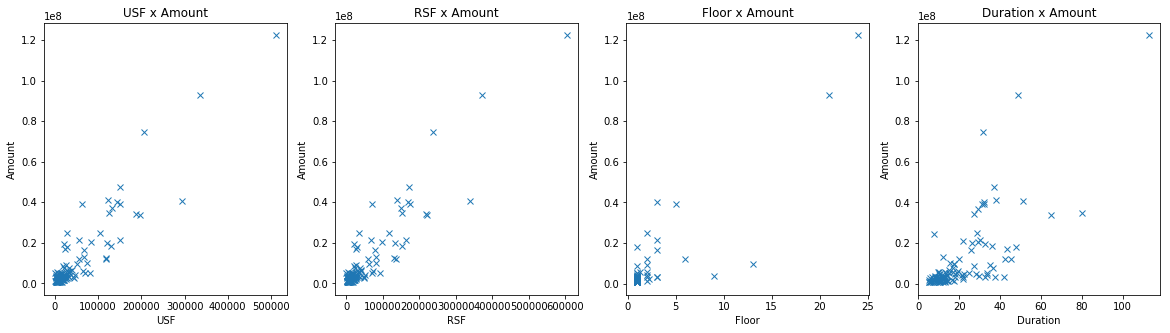

In [11]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(features[numerical_features].columns):
    plt.subplot(1, 4, i+1)
    plt.plot(data[col], target, 'x')
    plt.title('%s x Amount' % col)
    plt.xlabel(col)
    plt.ylabel('Amount')

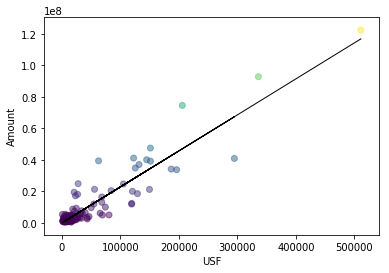

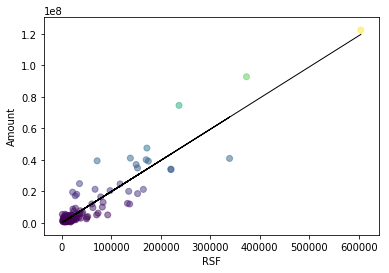

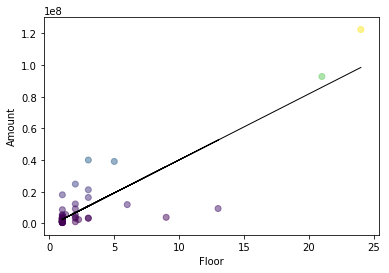

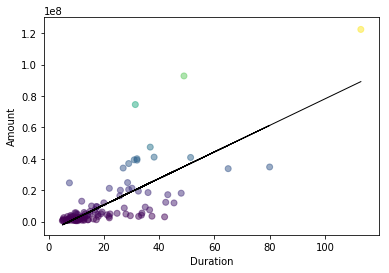

In [12]:
from sklearn.linear_model import LinearRegression

def linear_regression(data, feature_name):
    X = data[feature_name].values.reshape(-1, 1)
    y = data['Amount']
    
    model = LinearRegression()    
    model.fit(X,y)
    
    y_pred = model.predict(X)
    
    plt.plot(X, y_pred, linewidth=1, color='black')
    plt.scatter(X, y, alpha=0.5, c=data['Amount'])
    plt.xlabel(feature_name)
    plt.ylabel('Amount')
    plt.show()

for feature in numerical_features:
    linear_regression(data.dropna(subset=[feature]), feature)

#### Feature Distribution
Based on the charts below, one can realize that all four numerical features are heavily skewed. None of the features is close to the normal distribution, and the ranges are not properly normalized. Most of their values tend to lie toward a small number; however, the dataset also contains a few much larger numbers. Data transformation with a certain scale, as well as data normalization, might be required during preprocessing.

C:\Users\scliu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\scliu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


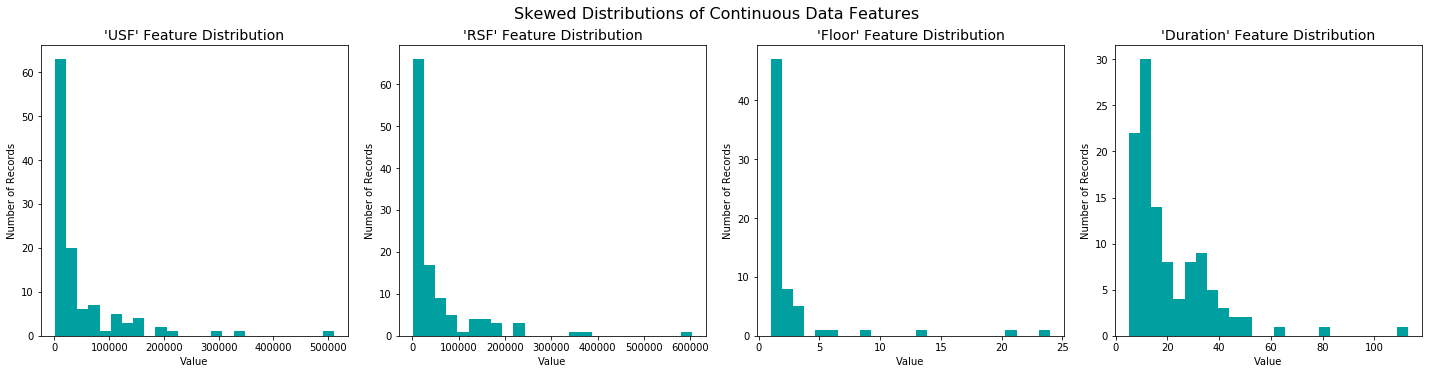

In [13]:
# Visualize skewed continuous features of original data
vs.distribution(features[numerical_features])

#### Feature Correlation
The scatter matrix below further reinforces my understanding of data distribution. All of the features are skewed and not normalized. Furthermore, the matrix also shows a very strong correlation between USF and RSF; the correlation coefficient is as high as 1. The find is aligned with the industry practices as one will simply multiply USF by 1.15 to retrieve an estimated RSF number while the real number is not accessible. Project size (USF & RSF) achieves high correlation numbers in between Floor and Duration, which is aligned with the intuition, too.  

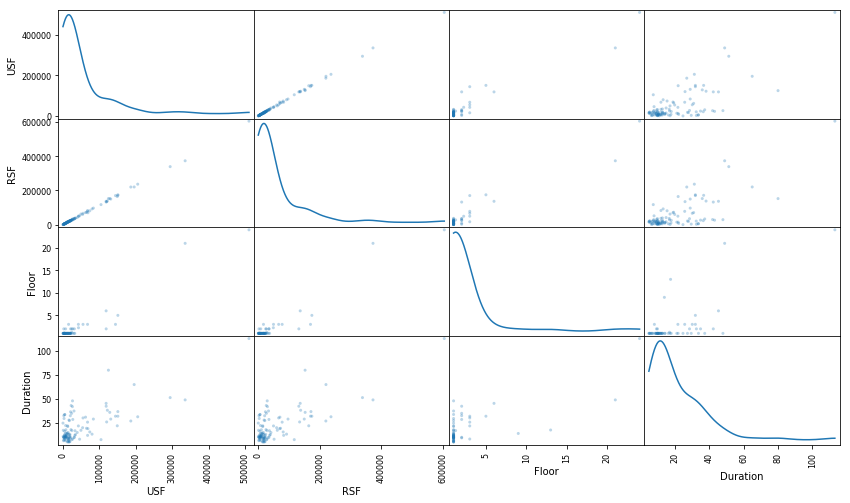

In [14]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(features[numerical_features], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [15]:
features[numerical_features].corr()

,USF,RSF,Floor,Duration
USF,1.000000,0.999409,0.956386,0.731781
RSF,0.999409,1.000000,0.952948,0.737626
Floor,0.956386,0.952948,1.000000,0.693855
Duration,0.731781,0.737626,0.693855,1.000000


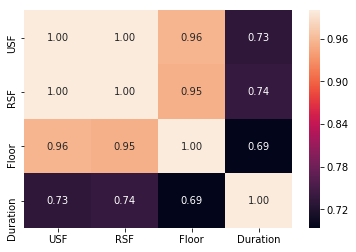

In [16]:
sns.heatmap(features[numerical_features].corr(), fmt='.2f', annot=True)

plt.show()

### Algorithms and Techniques
The solution I am proposing here is Machine Learning Regression algorithms. According to the [Scikit-learn algorithm cheat-sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) listed below and the characteristics of the given dataset, with more than 50 and less than 100K data points and with more than a few important features, the following models will be adopted to solve the problem:

* Ridge Regression
* Ensemble Regressors
* SVR (kernel = ‘linear’)
* SVR (kernel = ‘rbf’)

In addition to the above estimates, I would also like to try out more regression models mentioned in the Nanodegree:

* K Neighbor 
* Random Forest, as an ensemble regressor

Per the proposal review, I will further apply the following powerful algorithms on the problem:

* Xgboost
* LightGBM

Regression models will generate a numerical outcome so that the solution will then be quantifiable and measurable. Also, one can expect to receive a similar outcome when the appropriate inputs are provided; thus, the solution is replicable.

<img src="images/Scikit-learn algorithm cheat-sheet.png" style="width:750px"/>

In [17]:
# Import supervised learning models
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

# Initialize models
reg_1 = Ridge()
reg_2 = RandomForestRegressor() #Ensemble Regressors
reg_3 = SVR(kernel = 'linear')
reg_4 = SVR(kernel = 'rbf')
reg_5 = KNeighborsRegressor()
reg_6 = XGBRegressor()
reg_7 = lgb

### Benchmark
#### Existing Workflow: Matric of Amount per Area
The benchmark model I am proposing here is our current approach to leverage historical data. And, the existing methods in our preconstruction team for cost prediction are as straightforward as filtering and averaging. What is noteworthy is that the current workflow is a manual process and typically full of trial-and-error. It is very likely that one is required to play with the model a few times to obtain the desired result.

When a new project comes in, we will first collect all the project characteristics as inputs. And, Instead of directly using the total amount as output, we create another metric called amount per square footage for each and every past project. Based on the inputs from the new project, we will then filter the database down to only the projects perfectly aligned with the given characteristics. Finally, we will eliminate the extreme data and average the amounts per square footage, then multiply the averaged number by the project size to retrieve the predicted cost. The following shows our HDCCo database and dashboard built with Google sheet and Google Apps Script.

Due to the limitation of data number and the infinite possibilities of feature combination, it is apparent that sometimes the criteria are too strict so that no data point remains after the filtering process. As a result, users need to use their own judgments to determine the features they would like to use to select/filter the data, which eventually makes the process become not replicable. For the purpose of consistency, I am going to use only the top 3 common features for the filtering process, including client type, project scope, and project function.

The output of the benchmark model is the project predicted cost, which is exactly the same as the Machine Learning Regressions. Thus, the model is quantifiable as well as measurable. Moreover, its performance will be evaluated by the same metrics, too; it then becomes comparable to the regression models.

<img src="images/HDCCo database dashboard.png"/>

#### Simple Algorithm-based Approach: Linear Regression
The most commonly used metric in the industry to generate the estimated cost is the amount per area. Estimators will first retrieve the metric value through their own workflows and methods, ours is filtering and averaging, for example, and they will then multiply the unit cost and project size to obtain the total cost. What is noteworthy is that the approach itself, as a matter of fact, is built upon a fundamental assumption of the strong correlation between total costs and project sizes. What is more is that if one chooses to neglect the economies of scale while estimating, he/she predicts the cost purely based on the assumption of the simple linear correlation between project amounts and project sizes.

Thus, the algorithm of linear regression can be considered as a naive benchmark. And, since the correlation coefficient between USF and RSF equals 1, there should not be a big difference in the evaluation result while picking either one for training purposes. Here, USF is chosen and will be treated as the input for the simple linear regression to predict the amount of project. The matrix of R2 score will be applied to the model to evaluate its performance so that the benchmark can be compared with the more complex algorithm.

## Methodology
### Data Preprocessing (ML Pipeline #2)
Only the dataset with quality can lead to a meaningful model. Data preprocessing is a fundamental step to assure the model reliability through cleaning, formatting, infilling, and scaling the raw data. In this section, 6 preprocessing steps will be performed sequentially to help with the prediction/estimation outcomes based on the understanding of the data characteristics in the previous section.

#### Escalation
All the data points/projects are recorded at different timings; some of them might have a decade difference in between. The process of escalation is to convert the project amounts in various years to today's dollar. Several construction cost indices are adopted, mixed, and weighted to generate the index for our own needs. The indices include but not limit to:

* Engineering News-Record ([ENR](https://www.enr.com/economics)), Building Cost Index (BCI) & Construction Cost Index (CCI)
* [TBD Bid Index](http://www.tbdconsultants.com/mobi/TBDBidIndex.htm)
* Turner’s Building Cost Index ([BCI](http://www.turnerconstruction.com/cost-index))
* Mortenson’s Construction Index ([CCI](https://www.mortenson.com/cost-index))
* Local subcontractors’ labor rates

What is noteworthy is that the step of escalation happens in our own database/Google sheet environment and completed in advance to the entire machine learning workflow. Therefore, the methodology will only be discussed here and will not be included under the code blocks in Jupyter Notebook.

#### One-hot Encoding
According to the previous data exploration, the dataset contains both numerical and non-numeric features. Since machine learning algorithms only accept numerics as inputs, all the categorical variables must be converted into the format of numeric. One-hot encoding will generate variables of 0 & 1 and re-represented the data for each and every possible category of each non-numeric feature.

The step of one-hot encoding also happens in our own database/Google sheet environment and completed prior to the entire machine learning workflow. Therefore, the preprocessing step will only be discussed here and will not be included under the code blocks in Jupyter Notebook.

#### Missing Data
Based on the process of data exploration and the missing matrix plotted below, one can understand that the following features do contain missing data points:

* USF, 2 missing points
* RSF, 2 missing points
* Floor, 51 missing points
* Duration, 7 missing points

Fortunately, all the features listed above are numerical features, and based on the suggestion from the [article](https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce), the method of mean is chosen to infill the voids. By calling Imputer from sklearn, the mean value of each feature will then be adopted for all the missing values.

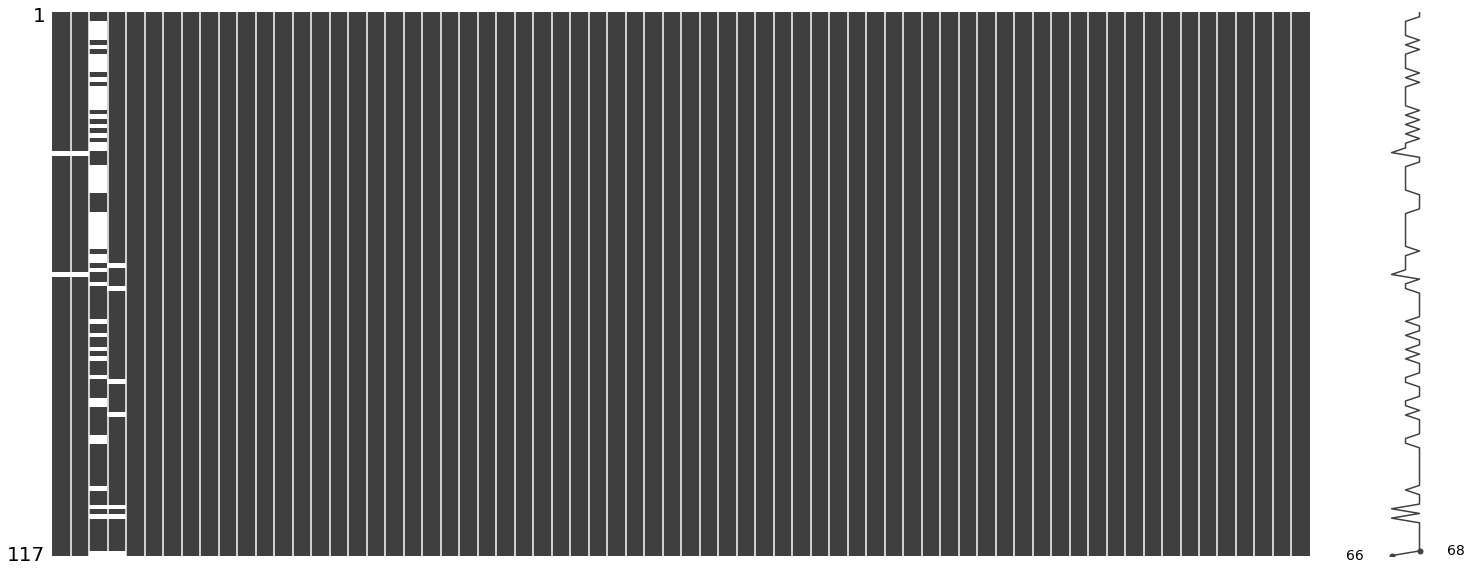

In [18]:
import missingno as msno
display(msno.matrix(features))

In [19]:
features.isnull().sum()

USF                                                            2
RSF                                                            2
Floor                                                         51
Duration                                                       7
2020-Commercial-and-Professional-Services                      0
2530-Consumer-Services                                         0
2530.10.20-Hotels-and-Resorts                                  0
2530.10.40-Restaurants                                         0
2540-Media                                                     0
2550-Retailing                                                 0
3020-Food-Beverage-and-Tobacco                                 0
3510-Health-Care-Equipment-and-Services                        0
4010-Banks                                                     0
4020-Diversified-Financials                                    0
4030-Insurance                                                 0
4510-Software-and-Service

In [20]:
#Numerical NaNs
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)

for feature in numerical_features:
    features[[feature]] = imputer.fit_transform(features[[feature]])

C:\Users\scliu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [21]:
display(features.head(n = 10))

,USF,RSF,Floor,Duration,2020-Commercial-and-Professional-Services,2530-Consumer-Services,2530.10.20-Hotels-and-Resorts,2530.10.40-Restaurants,2540-Media,2550-Retailing,...,01-Traditional-Overhead-MEP-Distribution,02-Raised-Access-Floor-with-Underfloor-MEP-Distribution,03-Data-Center,04-Labs,05-Full-Service-Kitchen,San-Francisco,South-Bay,Campus,Urban,Suburban
0,511014.0,604559.0,24.000000,113.0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,335872.0,373191.0,21.000000,49.0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,205743.0,236789.0,2.371212,31.4,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
3,151224.0,171776.0,2.371212,36.8,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
4,122454.0,138313.0,2.371212,38.2,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
5,294765.0,338980.0,2.371212,51.4,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
6,144741.0,170284.0,3.000000,32.0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,1,0
7,62554.0,71084.0,2.371212,31.0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
8,151275.0,174750.0,5.000000,32.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
9,131734.0,150000.0,2.371212,29.0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,1,0


#### Feature Transformation
Based on the distribution plots in the data exploration steps, one can realize that means and medians vary significantly for all of the numerical features, which indicates that they are not normally distributed. Furthermore, all the numeric features are all skewed, having most of the data points located toward a small value, while having a few data points on the extreme right simultaneously.

One of the best approaches for the issue is [data transformation](https://en.wikipedia.org/wiki/Data_transformation_(statistics)), and one of the most commonly used methods is natural logarithmic transformation. After the transformation/scaling process, the distributions are more alike normal distribution, and those outliers (very large or very small values) will have much less negative impacts on machine learning algorithms, too.

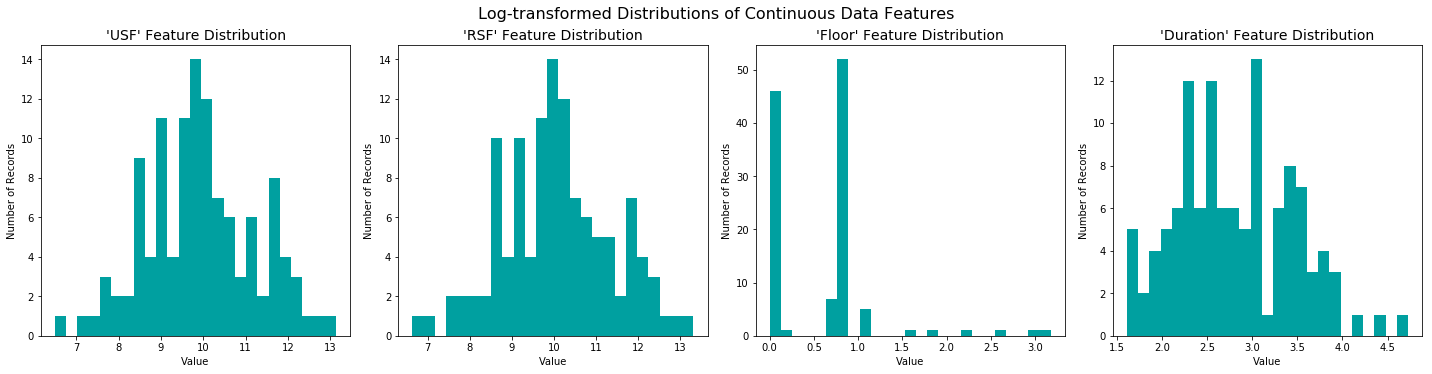

In [22]:
# Scale the data using the natural logarithm
features[numerical_features] = np.log(features[numerical_features])

# Visualize the new log distributions
vs.distribution(features[numerical_features], transformed = True)

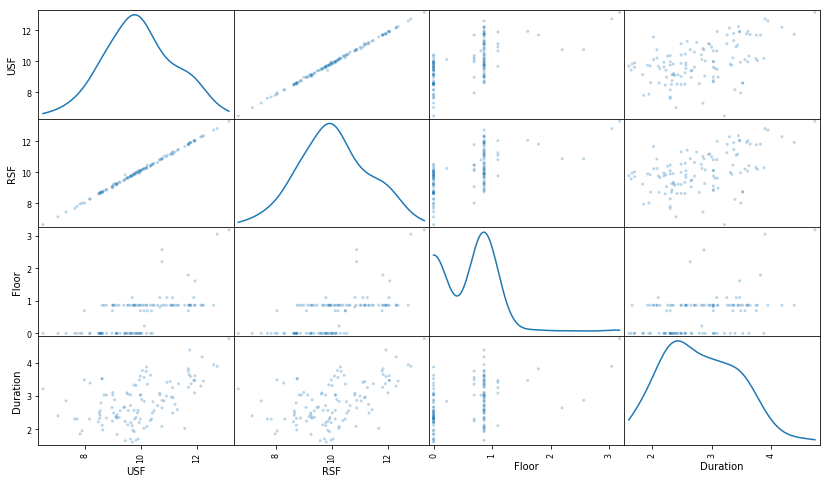

In [23]:
# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(features[numerical_features], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [24]:
display(features.head(n=10))

,USF,RSF,Floor,Duration,2020-Commercial-and-Professional-Services,2530-Consumer-Services,2530.10.20-Hotels-and-Resorts,2530.10.40-Restaurants,2540-Media,2550-Retailing,...,01-Traditional-Overhead-MEP-Distribution,02-Raised-Access-Floor-with-Underfloor-MEP-Distribution,03-Data-Center,04-Labs,05-Full-Service-Kitchen,San-Francisco,South-Bay,Campus,Urban,Suburban
0,13.144152,13.312255,3.178054,4.727388,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,12.724485,12.829846,3.044522,3.891820,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,12.234383,12.374925,0.863401,3.446808,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
3,11.926517,12.053947,0.863401,3.605498,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
4,11.715491,11.837275,0.863401,3.642836,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
5,12.593934,12.733696,0.863401,3.939638,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
6,11.882701,12.045223,1.098612,3.465736,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,1,0
7,11.043785,11.171618,0.863401,3.433987,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
8,11.926855,12.071112,1.609438,3.465736,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
9,11.788540,11.918391,0.863401,3.367296,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,1,0


#### Outlier Detection

According to the scatter matrix above, I assume that there are still a few outliers in the dataset, even after the process of feature scaling. Based on the suggestion from the [article](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623), the method of standard deviation/z-score is chosen to detect and remove outliers/anomalous. The thresholds are set as the following, in which [98.7%](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) of the data points should lie within for a normal distribution:

* Lower limit = mean - 2.5 x standard deviation
* Upper limit = mean + 2.5 x standard deviation

The results confirm my initial assumption. The following numerical features do contain outliers which are located outside of the 2.5 standard deviation boundaries and removed accordingly:

* USF: Data point #42
* RSF: Data points #0 and #42
* Floor: Data points #0, #1, #30, and #56
* Duration: Data point #0

In [25]:
# For each feature find the data points with extreme high or low values
all_outliers_index = []

for feature in numerical_features:

    # Calculate standard deviation
    std = np.std(features[feature])
    
    # Calculate mean
    mean = np.mean(features[feature])
    
    # Use z-score to calculate an outlier step (2.5 times standard deviation from mean)
    step = 2.5 * std
    
    # Display the outliers
    print("\nData points considered outliers for the feature '{}':".format(feature))
    outliers = features[~((features[feature] >= mean - step) & (features[feature] <= mean + step))]
    display(outliers)
    
# Select the indices for data points you wish to remove
    outliers_index  = []
    for index in outliers.index:
        outliers_index.append(index)
        all_outliers_index.append(index)
    
    print ("Outlier step in",feature,": ",step)
    print ("Outlier indices in",feature,": ",outliers_index)
    print ("Number of outliers in",feature,": ",len(outliers_index))

# Remove the outliers, if any were specified
all_outliers_index_wo_duplication = np.unique(all_outliers_index)
target = target.drop(target.index[all_outliers_index_wo_duplication]).reset_index(drop = True)
features = features.drop(features.index[all_outliers_index_wo_duplication]).reset_index(drop = True)

duplicated_outliers_index = []
for outliers_index in all_outliers_index:
    if all_outliers_index.count(outliers_index)>1:
        duplicated_outliers_index.append(outliers_index)

duplicated_outliers_index = np.unique(duplicated_outliers_index)

print ("\nNumber of outliers (with duplicated indices): ",len(all_outliers_index))
print ("Number of outliers (with unique indices): ",len(all_outliers_index_wo_duplication))
print ("Indices of duplicated outliers: ",duplicated_outliers_index)
print ("New dataset without outliers has {} samples and {} features.".format(*features.shape))


Data points considered outliers for the feature 'USF':


,USF,RSF,Floor,Duration,2020-Commercial-and-Professional-Services,2530-Consumer-Services,2530.10.20-Hotels-and-Resorts,2530.10.40-Restaurants,2540-Media,2550-Retailing,...,01-Traditional-Overhead-MEP-Distribution,02-Raised-Access-Floor-with-Underfloor-MEP-Distribution,03-Data-Center,04-Labs,05-Full-Service-Kitchen,San-Francisco,South-Bay,Campus,Urban,Suburban
42,6.49224,6.632002,0.0,3.210844,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


Outlier step in USF :  3.2091528978619746
Outlier indices in USF :  [42]
Number of outliers in USF :  1

Data points considered outliers for the feature 'RSF':


,USF,RSF,Floor,Duration,2020-Commercial-and-Professional-Services,2530-Consumer-Services,2530.10.20-Hotels-and-Resorts,2530.10.40-Restaurants,2540-Media,2550-Retailing,...,01-Traditional-Overhead-MEP-Distribution,02-Raised-Access-Floor-with-Underfloor-MEP-Distribution,03-Data-Center,04-Labs,05-Full-Service-Kitchen,San-Francisco,South-Bay,Campus,Urban,Suburban
0,13.144152,13.312255,3.178054,4.727388,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
42,6.492240,6.632002,0.000000,3.210844,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


Outlier step in RSF :  3.2209997580330905
Outlier indices in RSF :  [0, 42]
Number of outliers in RSF :  2

Data points considered outliers for the feature 'Floor':


,USF,RSF,Floor,Duration,2020-Commercial-and-Professional-Services,2530-Consumer-Services,2530.10.20-Hotels-and-Resorts,2530.10.40-Restaurants,2540-Media,2550-Retailing,...,01-Traditional-Overhead-MEP-Distribution,02-Raised-Access-Floor-with-Underfloor-MEP-Distribution,03-Data-Center,04-Labs,05-Full-Service-Kitchen,San-Francisco,South-Bay,Campus,Urban,Suburban
0,13.144152,13.312255,3.178054,4.727388,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,12.724485,12.829846,3.044522,3.891820,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
30,10.749346,10.884605,2.564949,2.867899,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
56,10.749346,10.884605,2.197225,2.639057,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0


Outlier step in Floor :  1.5166594800166058
Outlier indices in Floor :  [0, 1, 30, 56]
Number of outliers in Floor :  4

Data points considered outliers for the feature 'Duration':


,USF,RSF,Floor,Duration,2020-Commercial-and-Professional-Services,2530-Consumer-Services,2530.10.20-Hotels-and-Resorts,2530.10.40-Restaurants,2540-Media,2550-Retailing,...,01-Traditional-Overhead-MEP-Distribution,02-Raised-Access-Floor-with-Underfloor-MEP-Distribution,03-Data-Center,04-Labs,05-Full-Service-Kitchen,San-Francisco,South-Bay,Campus,Urban,Suburban
0,13.144152,13.312255,3.178054,4.727388,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


Outlier step in Duration :  1.6019069467822202
Outlier indices in Duration :  [0]
Number of outliers in Duration :  1

Number of outliers (with duplicated indices):  8
Number of outliers (with unique indices):  5
Indices of duplicated outliers:  [ 0 42]
New dataset without outliers has 112 samples and 68 features.


In [26]:
display(target.shape)

(112,)

In [27]:
display(features.shape)

(112, 68)

#### Normalizing Numerical Features
In addition to feature transformation, feature scaling should also be applied to the dataset. Normalizing the data is to make sure that all the features are within the same scale, and therefore to be treated equally during the training process. What is noteworthy is that even though the values/meanings are changed from the raw data, the shapes/distributions still remain the same.

In [28]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

#features_minmax_transform = pd.DataFrame(data = features)
features[numerical_features] = scaler.fit_transform(features[numerical_features])

In [29]:
display(features.head(n = 10))

,USF,RSF,Floor,Duration,2020-Commercial-and-Professional-Services,2530-Consumer-Services,2530.10.20-Hotels-and-Resorts,2530.10.40-Restaurants,2540-Media,2550-Retailing,...,01-Traditional-Overhead-MEP-Distribution,02-Raised-Access-Floor-with-Underfloor-MEP-Distribution,03-Data-Center,04-Labs,05-Full-Service-Kitchen,San-Francisco,South-Bay,Campus,Urban,Suburban
0,0.935379,0.935920,0.481873,0.662691,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
1,0.880047,0.878590,0.481873,0.719926,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
2,0.842119,0.839891,0.481873,0.733393,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
3,1.000000,1.000000,0.481873,0.840442,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
4,0.872172,0.877032,0.613147,0.669518,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,1,0
5,0.721395,0.720998,0.481873,0.658067,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
6,0.880107,0.881656,0.898244,0.669518,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
7,0.855248,0.854379,0.481873,0.634013,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,1,0
8,0.846317,0.857585,0.481873,1.000000,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
9,0.917994,0.922911,0.481873,0.608240,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1


### Implementation
#### Shuffle and Split Data (ML Pipeline #3)
In this section, the dataset (including both features and target) will be split into 2 subsets as training and testing with a certain ratio, 80-20 in our case here. Data points will be randomly shuffled in the splitting process to avoid bias in the ordering of the dataset.

Validation set, on the other hand, will be split and manipulated later for grid-search/cross-validation to fine-tune the model parameters and select the optimized combination. The process will be further discussed in detail under the model tuning section.

* Training Set: 80%, 89 samples
* Testing Set: 20%, 23 samples
* Validation Set

In [30]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.2)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 89 samples.
Testing set has 23 samples.


#### Creating a Training and Predicting Pipeline (Model Training, ML Pipeline #4)
In this section, the training and predicting pipeline is coded with its maximum flexibility.  It can be quickly applied to a variety of machine learning algorithms and data sizes, and the predicted results can be calculated  and displayed in an efficient and clean manner. The inputs and output of the pipeline are listed below:

* Inputs
>* learner: The learning algorithm to be trained and predicted on
>* sample_size: The size of samples (number) to be drawn from training set
>* X_train: Features training set
>* y_train: Income training set
>* X_test: Features testing set
>* y_test: Income testing set

* Output, a Python library including the information below
>* learner: The learning algorithm to be trained and predicted on
>* training_size: The size of samples (number) to be drawn from training set
>* R2_train: R2 score of the training set
>* R2_test: R2 score of the testing set

In [31]:
def train_predict_sklearn(learner, sample_size, X_train, y_train, X_test, y_test): 
    results = {}
    
    # Record learner name & size
    results['learner'] = learner.__class__.__name__
    results['training_size'] = sample_size
    
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])

    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    
    # Compute R2 score on the training set
    results['R2_train'] = r2_score(y_train,predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['R2_test'] = r2_score(y_test,predictions_test)
    
    # Show results
    display(results)

In [32]:
def train_predict_lightGBM(learner, sample_size, X_train, y_train, X_test, y_test): 
    results = {}

    # Create dataset for lightgbm
    lgb_train = learner.Dataset(X_train, y_train)
    lgb_eval = learner.Dataset(X_test, y_test, reference=lgb_train)

    # Specify your configurations as a dict
    params = {'objective': 'regression'}

    # Train
    gbm = learner.train(params,lgb_train)

    # Record learner name & size
    results['learner'] = gbm.__class__.__name__
    results['training_size'] = sample_size

    # Predict
    predictions_train = gbm.predict(X_train)
    predictions_test = gbm.predict(X_test)

    # Evaluation
    results['R2_train'] = r2_score(y_train,predictions_train)
    results['R2_test'] = r2_score(y_test,predictions_test)

    # Show results
    display(results)

### Refinement

#### Initial Model Evaluation (ML Pipeline #5)
All of the 7 regression models listed in the Algorithms and Techniques section are fed into the pipeline above. What is noteworthy is that since the training set only contains 89 samples, the training process should run fairly fast, and no duration issue needs to be considered; all of the data points are used to train the model here.

The performances of 7 models are then evaluated by the matrix of R2 score. The results are as follows:

In [33]:
samples_100 = int(1.00*len(X_train))

# Run pipline for Scikit-learn algorithm & Xgboost
for i,reg in enumerate([reg_1, reg_2, reg_3, reg_4, reg_5, reg_6]):
    train_predict_sklearn(reg, samples_100, X_train, y_train, X_test, y_test)

# Run pipline for lightGBM
train_predict_lightGBM(reg_7, samples_100, X_train, y_train, X_test, y_test)

{'learner': 'Ridge',
 'training_size': 89,
 'R2_train': 0.9020664189437666,
 'R2_test': 0.6616980517415214}

C:\Users\scliu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'learner': 'RandomForestRegressor',
 'training_size': 89,
 'R2_train': 0.9445023529531205,
 'R2_test': 0.6472859004682322}

{'learner': 'SVR',
 'training_size': 89,
 'R2_train': -0.18005143780203303,
 'R2_test': -0.1854846571151778}

C:\Users\scliu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'learner': 'SVR',
 'training_size': 89,
 'R2_train': -0.18005627868310614,
 'R2_test': -0.18549046484490872}

{'learner': 'KNeighborsRegressor',
 'training_size': 89,
 'R2_train': 0.6834981013180945,
 'R2_test': 0.5991030704527256}

[12:09:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


{'learner': 'XGBRegressor',
 'training_size': 89,
 'R2_train': 0.9975151936169008,
 'R2_test': 0.7812351056657587}

{'learner': 'Booster',
 'training_size': 89,
 'R2_train': 0.8382471876690899,
 'R2_test': 0.5984240595292527}

#### Choosing the Best Model (ML Pipeline #6)

**Xgboost** is chosen as the best model as it achieves the highest scores on both training and testing datasets compared to all the other models, and the scores of 0.998 and 0.781 are absolutely high, too. The regression is most appropriate for the task of predicting construction costs based on the given data.

#### Model Tuning (ML Pipeline #7)
In this section, the selected regression of Xgboost will then be fine-tuned to achieve a better performance using grid-search technique. "Make a table, think of all the possibilities, and pick the best one." Xgboost has multiple hyper-parameters, and through the tuning technique, the optimized combination of those can be determined. The parameters chosen for grid-search are as follows:

* Max depth, with values of 1, 2, 3, 4, and 5
* N estimators, with values of 50, 100, 500, 1000, 2000, and 4000

The matrix of R2 score is adopted once again to evaluate the model performances. The one with the highest score will be determined as the optimized model, and will be used for the final cost prediction. According to the following line chart and heatmap, one can realize that the highest score occurs with the combination of:

* Max depth as 2
* N estimators as 100
* R2 score as 0.73

In [34]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the classifier
reg = XGBRegressor()

# Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
max_depth = [1,2,3,4,5]
n_estimators = [50,100,500,1000,2000,4000]

parameters = {'max_depth':max_depth,'n_estimators':n_estimators}

# Make an r2_score scoring object using make_scorer()
scorer = make_scorer(r2_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=reg, param_grid=parameters,scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

[12:09:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:09:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaco

[12:09:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:09:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:09:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:09:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:09:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:09:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaco

[12:10:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:01] WARNI

C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaco

[12:10:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:17] WARNI

C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:10:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


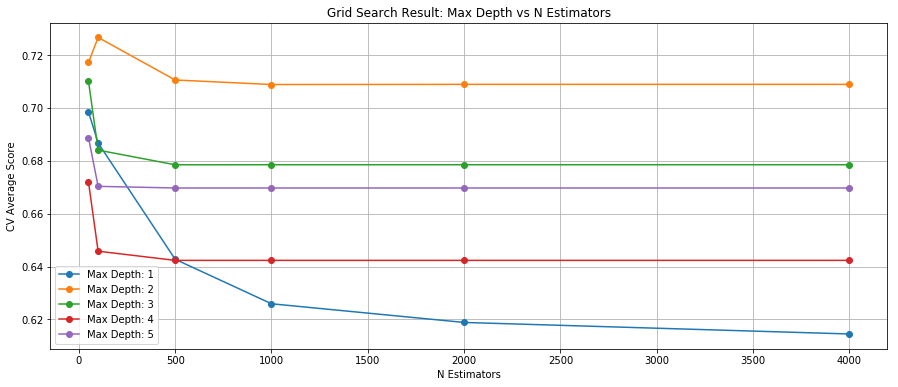

In [35]:
# Graph gid scores from GridSearchCV

def plot_grid_search(scores_array, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Plot Grid search scores
    _, ax = plt.subplots(figsize=(15,6))

    # Param 1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_array[idx,:], '-o', label= name_param_1 + ': ' + str(val))

    ax.set_title('Grid Search Result: Max Depth vs N Estimators')
    ax.set_xlabel(name_param_2)
    ax.set_ylabel('CV Average Score')
    ax.legend(loc="best")
    ax.grid('on')   

# Plot
scores_means = grid_fit.cv_results_['mean_test_score']
scores_array = np.array(scores_means).reshape(len(max_depth),len(n_estimators))
plot_grid_search(scores_array, n_estimators, max_depth, 'Max Depth', 'N Estimators')

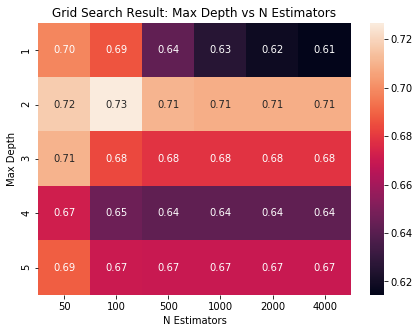

In [36]:
# Plot grid search results
mpl.rcParams['figure.figsize'] = (7, 5)
sns.heatmap(data =scores_array, annot=True, fmt='.2f', xticklabels = n_estimators, yticklabels = max_depth)
plt.title('Grid Search Result: Max Depth vs N Estimators')
plt.xlabel('N Estimators')
plt.ylabel('Max Depth')

plt.show()

In [37]:
# Get the estimator
best_reg = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (reg.fit(X_train, y_train)).predict(X_test)
best_predictions = best_reg.predict(X_test)

best_reg

[12:10:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

## Results
### Model Evaluation and Validation (ML Pipeline #8)
#### Scores Before-and-After Model Tuning
After choosing the best regression model and fine-tuning the selected model with its hyper-parameters, now is the time to evaluate the performance of the optimized model. The matrix of R2 score is used here, and the comparison of the scores between before and after model tuning shows as follows:

* Unoptimized model: 0.7812
* Optimized model: 0.9311

One can easily realize that there is a significant performance increase (19.18%) between the two models. A great success is achieved through grid-search, and the R2 results further emphasize the importance of model tuning.

In [38]:
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("R2 score on testing data: {:.4f}".format(r2_score(y_test, predictions)))
print("\nOptimized model\n------")
print("Final R2 score on the testing data: {:.4f}".format(r2_score(y_test, best_predictions)))

Unoptimized model
------
R2 score on testing data: 0.7812

Optimized model
------
Final R2 score on the testing data: 0.9311


#### Feature Importance
By calling feature_importance_ from Xgboost, the ranking and the weights of the features while making cost predictions will be listed out. One can then extract the most relevant features, remove the irrelevant ones, and train the model purely with those important features. By doing this, the duration of the training process can be decreased significantly since there are lesser features that need to be considered. However, as a trade-off, the performance matrix is expected to be lower, too.

According to the following graph, one can understand that the top 5 most important features contribute almost 80% of the importance of all features existing in the dataset, which is 68, by the way. This implies that it might be appropriate to reduce the feature space for the purpose of simplicity. The R2 scores for both models before and after feature selection are listed below. This is a significant decrease (92.65%) in size at the cost of the drop in performance (11.19%).

* Training on full data (68 features): 0.9311
* Training on reduced data (5 features): 0.8292

Apparently, size reduction is not a necessity in our case while only having 112 data points as the training time is very short and is not an issue at all. However, what is noteworthy is that the dataset contains a significant number of features, and along with the increase of data points, the training time will increase quickly. When one reaches the point that the model takes a long period to train, that is the time to consider extracting features and to only train the model on those importances, even with a small trade-off of model performance.

[12:10:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\scliu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


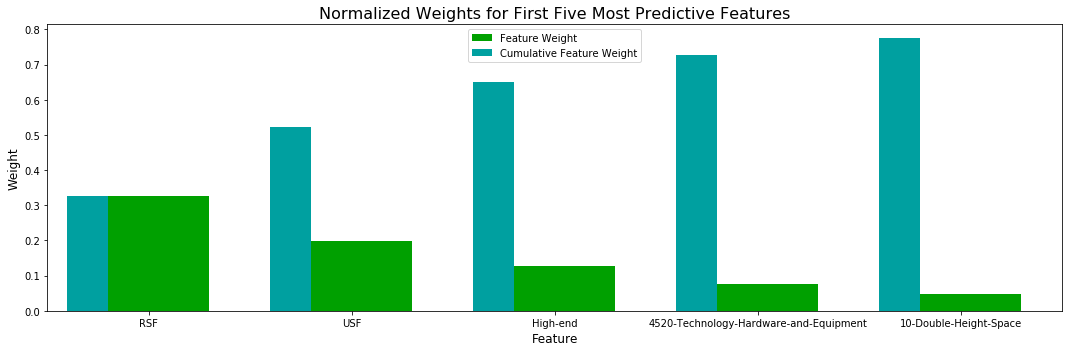

In [39]:
# Import a supervised learning model that has 'feature_importances_'
reg_feature = XGBRegressor()

# Train the supervised model on the training set using .fit(X_train, y_train)
model = reg_feature.fit(X_train,y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [40]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
reg = (clone(best_reg)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = reg.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("R2 on testing data: {:.4f}".format(r2_score(y_test, best_predictions)))
print("\nFinal Model trained on reduced data\n------")
print("R2 on testing data: {:.4f}".format(r2_score(y_test, reduced_predictions)))

[12:10:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Final Model trained on full data
------
R2 on testing data: 0.9311

Final Model trained on reduced data
------
R2 on testing data: 0.8292


### Justification (ML Pipeline #9)
In this section, the optimized Xgboost model and its performance will be compared to the benchmarks established earlier in the project. The matric of R2 score is adopted here to evaluate the model results.

* Existing Workflow: Matric of Amount per Area
> Per the discussion in the section of Benchmark, the existing approach of filtering and averaging might lead to some severe overfittings because of the lack of data points, and the workflow should be a trial-and-error process. After several tries, I notice that if there are more than 1 criteria to be used for filtering, the chance of having only 1 or even 0 project data filtered increases significantly. Therefore, the decision is made to only use one of the most commonly used project characteristics at a time to filter the data and to retrieve the matric of the amount per area through averaging the target values of filtered projects. The R2 scores with different filters are calculated in our in-house database/Google sheet environment and listed as follows:
>* Filter with Client Type: 0.7940
>* Filter with Project Scope: 0.8579
>* Filter with Project Function: 0.7968
>
> Although they are not as high as the R2 score of the optimized Xgboost regression model at 0.9311, the scores calculated based on the existing workflow are not bad at all. However, what is noteworthy is that during the calculation, I find that there are still some cases only having 1 data point filtered. Plus, only one feature being considered will also cause the issue of overfitting. The existing workflow might seem to do a decent job by only looking at its R2 score; nevertheless, it is not a robust model at all due to its drawback of overfitting. Part of the reason is due to the data shortage, while the primary reason being its simple algorithm of true/false filtering.

* Simple Algorithm-based Approach: Linear Regression
> The R2 score of the linear regression model trained on the feature of USF is 0.4035. This is indeed a very low score compared to the optimized Xgboost algorithm. The graph below further reinforces the result as one can understand that the predictions are very off from the true values. Therefore, the justification can be made that these results and the solution are significant enough to have solved the problem posed in the project.

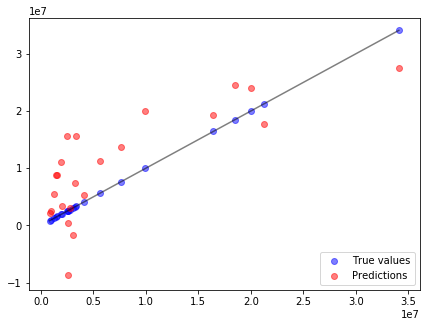

In [41]:
# Benchmark: Simple Linear Regression
X_train_benchmark = X_train['USF'].values.reshape(-1, 1)
X_test_benchmark = X_test['USF'].values.reshape(-1, 1)

reg = LinearRegression().fit(X_train_benchmark,y_train)
benchmark_predictions = reg.predict(X_test_benchmark)

# Plot ture values
true= y_test
true_plot = plt.scatter(true, true, alpha=0.5, color='blue', label='True values')

# Plot predictions
pred = benchmark_predictions
pred_plot = plt.scatter(true, pred, alpha=0.5, color='red', label='Predictions')

# Reference line
fit = np.poly1d(np.polyfit(true, true, 1))
lims = np.linspace(min(true)-1, max(true)+1)
plt.plot(lims, fit(lims), alpha=0.5, color='black')

# Legend and show
plt.legend(handles=[true_plot, pred_plot], loc='lower right')
plt.show()

In [42]:
print("Benchmark Model, Linear Regression, trained on USF\n------")
print("R2 on testing data: {:.4f}".format(r2_score(y_test, benchmark_predictions)))

Benchmark Model, Linear Regression, trained on USF
------
R2 on testing data: 0.4035


## Conclusion
### Free-Form Visualization
All the free-form visualizations, including diagram, plot, chart, heatmap, snapshot, matrix, and et cetera that I considered meaningful, storytelling, and necessary are placed and discussed thoroughly in the corresponding sections earlier in the report. Please refer to the desired section for more information.
### Reflection
* Interesting Aspects of the Project
>* Domain Background/Problem Statement
>> As I mentioned previously, The AEC industry is not very good at embracing advanced technology and opening to new ideas. I have only been working less than 2 years, and as a newbie in the industry, I have an innovative mind and am keen to propose an alternative, perhaps a more robust solution to the long-lasting problem. I am thrilled that the prototype is created successfully, in which more opportunities are opened to me. The industry has been run purely by human experiences for so long, and I believe this is the exact reason for its slow development pace. A data-driven strategy could be a way out to break through the existing barriers and lead the industry to a new era. 
>* Data Exploration/Feature Importance
>> The project allows me to examine our current database, as well as its structure with a different perspective. We did not have a logical/mathematical way to evaluate the importance and the relationship of all the features before but simply manipulated them with our intuitions. With the help from numpy and sklearn, all the data points are analyzed and displayed in a systematic manner. We can then determine which features are more relevant and which are not based on the analytics. After all, a feature number of 68 is not only too much for the computer but also for the human being to process. 
>* Benchmark/Justification
>> Again, it is always interesting comparing the existing workflow and the proposed one. The process helps me to understand the strengths, weaknesses, opportunities, and threats (SWOT) for both of the methodologies. According to the justification, our current filtering approach actually works pretty well with a small number of data points. This does explain why the industry is not willing to/lacking the motivation to seek a more robust and trustworthy solution. However, it heavily depends on human experiences to pick the appropriate criteria and to minimize the occurrence of overfitting. Therefore, the results are not replicable and will vary based on who is the user. On the other hand, the algorithm-based approach ensures the prediction consistency and avoids overfitting through the much more complex and thorough calculation process. Furthermore, the technique of machine learning will truly shine and beat the traditional workflow when the database scales up in the near future and along with the development of the company/industry.

* Difficult Aspects of the Project
> The difficulties are basically the same for the following three topics: too many options out there and not sure which one to pick. Based on the research I have done, there are multiple approaches to handle even one issue, and each decision could potentially affect the final results significantly. After a long period of trial-and-error, I realize this is indeed an iterative process, and per my reviewer, “... This is what makes this a science.” Indeed, all the feedback from the step of model evaluation and validation will provide some insights on determining the best combination, improving the predictions, and making us a better data scientist.>
>* Data Preprocessing
>* Algorithms and Techniques
>* Free-Form Visualization

* Comparison between Final Model and Expectations
> I must confess that the results of the final model exceed my expectations, considering only the minimal data points are provided. An R2 score of 0.9311 is indeed very good. And, I really appreciate the insights given by the feature importance as the raw dataset contains 68 features, and 5 of them can represent 80% of the data. This indicates that our current database is probably not built in a cleanest way, and there are more rooms for improvement. Saying that, though the project is an exciting prototype and has successfully proved itself as a legit workflow, I personally think it should not be used in a general setting to solve these types of problems until having a big enough dataset. The algorithm-based approach can only be as good as the number of useful data points. Before that happens, human inputs/experiences must be added in to help with decision-making.

### Improvement

* Machine-learning-related
>* Number of Data Points
>> This is the most fundamental issue, and it will get improved over time naturally. I believe that along with the growth of the dataset, the algorithm-based approach will gradually achieve its maximum capacity, becoming one of the best workflows for cost prediction in the entire industry. For now, the model is not robust enough as the model’s solution will be affected by tweaking the input values. However, the robustness will, for sure, grow once the size of the dataset becomes bigger, and the model will be well generalized simultaneously.
>* Feature Selection
>> For now, the dataset contains more features than data points, and this can be a big issue. According to the proposal review, one of the potential solutions is to reduce the feature space and only keep the essential features. sklean also provides some built-in functions that are able to select the most relevant features, such as [feature_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection), [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest), and [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile). More possible solutions are [likelihood encoding of categorical features](https://www.kaggle.com/tnarik/likelihood-encoding-of-categorical-features) or [smoothing](https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features).
>* Approach Selection of Data Preprocessing, Algorithms and Techniques, and Free-Form Visualization
>> This potential improvement has been discussed thoroughly in the above section of Difficult Aspects of the Project. Please refer to the section for more information.

* Deployment-related
>* Cloud-based
>> All the codes and the supporting files are saved locally on my personal computer now; however, the ultimate goal is to provide access for the entire company. Keeping everything on the cloud is a necessity. There are a lot of possible solutions/services on the market, including AWS, Azure, and et cetera.
>* User Interface
>> The front-end must be built as the expectation of everyone in the company being able to understand the codes and to type in inputs is not realistic. There are multiple accessible ways to construct the user interface, including some customized APIs.
>* Integration with Other Platform
>> We currently save all our data in the Google sheet environment, and we might migrate to a real database in the future when the number of data points grows. It is necessary either way to create a lived-link between the database/spreadsheet and the machine learning pipeline. Users won’t like the idea of exporting data from other places and feeding it into the algorithm every time they run the model. Also, it will be great if the pipeline can be linked with some outer data visualization tools, such as Google Data Studio, Power BI, and Tableau for better graphs and charts.


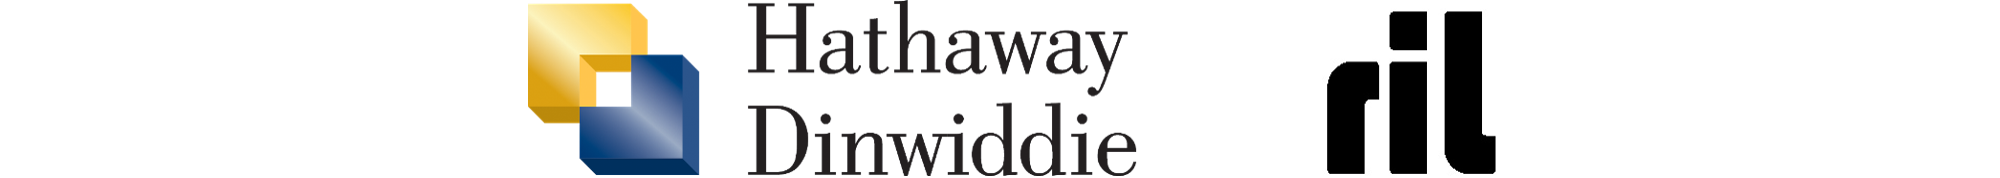